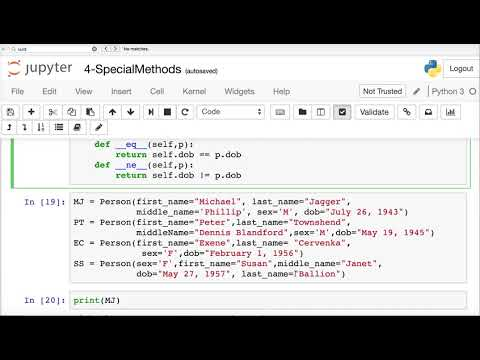

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo("2XPkDvpBMPU")

# Object Oriented Programming
## Special Methods

## Declarative Knowledge
* Understand how Python uses magic methods to define common task across objects
    * What does it mean to print an object?
    * What does it mean to compare an object?
    
## Procedural Knowledge
* Understand how to define meaningful magic (special) methods for objects

## Special (Magic) Methods

> A class can implement certain operations that are invoked by special syntax (such as arithmetic operations or subscripting and slicing) by defining methods with special names. **This is Python's approach to operator overloading, allowing classes to define their own behavior with respect to language operators.** ([Python Language Reference](http://docs.python.org/3/reference/datamodel.html#special-method-names))

* This is how **polymorphism** is achieved in Python.

### What are some of the special methods?
* **``__init__`` ** Constructor
* **``__str__`` ** Defines how you print an object
* **``__lt__`` ** defines less than operator (also le, eq, ne, gt, ge). 
    

In learning how to write programs to solve your problems, you always need to keep in mind your process of **abstraction.** This is relevant for defining the magic methods. 

### [``__str__``](https://docs.python.org/3/reference/datamodel.html#object.__str__)  and [``__repr__``](https://docs.python.org/3/reference/datamodel.html#object.__repr__): Design how to *show* an object

#### ``__repr__``: From the Python Documentation

>Called by the repr() built-in function to compute the “official” string representation of an object. If at all possible, this should look like a valid Python expression that could be used to recreate an object with the same value (given an appropriate environment). If this is not possible, a string of the form <...some useful description...> should be returned. The return value must be a string object. If a class defines ``__repr__()`` but not ``__str__()``, then ``__repr__()`` is also used when an “informal” string representation of instances of that class is required.
>
This is typically used for debugging, so it is important that the representation is information-rich and unambiguous.

#### ``__str__``: From the Python Documentation

>This method differs from ``object.__repr__()`` in that there is no expectation that ``__str__()`` return a valid Python expression: a more convenient or concise representation can be used.

Deciding how to *show* an integer might be relatively simple, but think about a float? The float might consist of an infinite decimal expansion (like $\pi$), or a repeating decimal expansion (like $\frac{1}{3}$) or a finite decimal expansion (like $\frac{5}{4}$). How do I choose how many decimal points to show?

In more complex objects, the choice of how to display an object can be, well, more complicated. 
* Am I likely to have a lot of the objects in a collection where I want to be able to appreciate the objects together?
    * If yes, then perhaps I need to create a very simple *show* of the object
* If I'm likely to be evaluating the objects in isolation, can I provide a more detailed view?

## How would you compare persons?
* What if we compared people by age
  

In [ ]:
import dateutil
import datetime
class Person(object): 
    def __init__(self,first_name=None,last_name=None,
                 middle_name='',sex='F', dob=None, **kwargs):
        self.sex = sex
        self.first_name = first_name
        self.middle_name = middle_name
        self.last_name = last_name
        if dob == None:
            self.__dob = None
        elif isinstance(dob,str):
            try:
                self.__dob = dateutil.parser.parse(dob)
            except Exception as error:
                print(error)
                self.__dob = None
        elif isinstance(dob.datetime.date):
            self.__dob = dob
        else:
            raise TypeError("Invalid date of birth specification")
        
        
    @property
    def dob(self):
        return self.__dob
    @property
    def age(self):
        td = datetime.datetime.now()-self.__dob
        return {"years":td.days//365, "months":td.days%365//30}
        
    @property
    def sex(self):
        return self.__sex
    @sex.setter
    def sex(self, value):
        if not isinstance(value,str):
            raise TypeError("Sex must be a string")
        if not value.upper()[0] in "MF":
            raise ValueError("Sex must be Male or Female")
        self.__sex = value.upper()[0]
    @property 
    def first_name(self):
        return self.__first_name
    @first_name.setter
    def first_name(self, value):
        if value == None:
            if self.sex == 'F':
                value = "Jane"
            else:
                value = "John"
        if not isinstance(value,str):
            raise TypeError("first name must be a string")
        self.__first_name = value
    @property 
    def last_name(self):
        return self.__last_name
    @last_name.setter
    def last_name(self, value):
        if value == None:
            value = "Doe"
        if not isinstance(value,str):
            raise TypeError("last name must be a string")
        self.__last_name = value
        
    @property 
    def middle_name(self):
        return self.__middle_name
    @middle_name.setter
    def middle_name(self, value):

        if not isinstance(value,str):
            raise TypeError("last name must be a string")
        self.__middle_name = value
    def get_full_name(self):
        name = "%s %s %s"%(self.first_name,
                           self.middle_name,
                           self.last_name)
        return name
        
    def __repr__(self):
        """Get the individual characteristics in a string"""
        txt = """First Name=%s\n"""%self.first_name
        txt += """Middle Name=%s\n"""%self.middle_name
        txt +="""Last Name=%s\n"""%self.last_name
        txt += """Sex=%s\n"""%self.sex
        txt += "Age=%d years, %d months\n"%(self.age["years"],
                                            self.age["months"])
        return txt
    
    def __str__(self):
        return """%s %s (Age=%d years, %d months)"""%(self.first_name,
                                                      self.last_name,
                                                      self.age["years"],
                                                      self.age["months"])
    def __lt__(self,p):
        return self.dob < p.dob
    def __le__(self,p):
        return self.dob <= p.dob
    def __gt__(self,p):
        return self.dob > p.dob
    def __ge__(self,p):
        return self.dob >= p.dob
    def __eq__(self,p):
        return self.dob == p.dob
    def __ne__(self,p):
        return self.dob != p.dob

In [ ]:
MJ = Person(first_name="Michael", last_name="Jagger",
            middle_name='Phillip', sex='M', dob="July 26, 1943")
PT = Person(first_name="Peter",last_name="Townshend",
            middleName="Dennis Blandford",sex='M',dob="May 19, 1945")
EC = Person(first_name="Exene",last_name= "Cervenka",
             sex='F',dob="February 1, 1956")
SS = Person(sex='F',first_name="Susan",middle_name="Janet",
            dob="May 27, 1957", last_name="Ballion")

In [ ]:
print(MJ)

In [ ]:
MJ

In [ ]:
SS.dob

In [ ]:
repr(MJ)

In [ ]:
print (MJ < PT)
print (MJ <= PT)
print (MJ > PT)
print (MJ >= PT)
print (MJ == PT)

### What if we wanted to compare by name instead of age?

* By inheriting from Person and defining new comparison operators

In [ ]:
class Person2(Person): 
    def __init__(self,**kwargs):
        super(Person2,self).__init__(**kwargs)
        
    def __lt__(self,p):
        return self.last_name+self.first_name+self.middle_name < p.last_name+p.first_name+p.middle_name
    def __le__(self,p):
        return self.last_name+self.first_name+self.middle_name <= p.last_name+p.first_name+p.middle_name
    def __gt__(self,p):
        return self.last_name+self.first_name+self.middle_name > p.last_name+p.first_name+p.middle_name
    def __ge__(self,p):
        return self.last_name+self.first_name+self.middle_name >= p.last_name+p.first_name+p.middle_name
    def __eq__(self,p):
        return self.last_name+self.first_name+self.middle_name == p.last_name+p.first_name+p.middle_name
    def __ne__(self,p):
        return self.last_name+self.first_name+self.middle_name != p.last_name+p.first_name+p.middle_name

### Key Conceptual Knowledge: 

* We can refine behavior by 
    * inherting from a class and 
    * overriding particular methods with newly defined methods with the same name.

In [ ]:
MJ2 = Person2(first_name="Michael", last_name="Jagger",
            middle_name='Phillip', sex='M', dob="July 26, 1943")
PT2 = Person2(first_name="Peter",last_name="Townshend",
            middleName="Dennis Blandford",sex='M',dob="May 19, 1945")
EC2 = Person2(first_name="Exene",last_name= "Cervenka",
             sex='F',dob="February 1, 1956")
SS2 = Person2(sex='F',first_name="Susan",middleName="Janet",
            dob="May 27, 1957", last_name="Ballion")

In [ ]:
print (MJ2 < PT2)
print (MJ2 <= PT2)
print (MJ2 > PT2)
print (MJ2 >= PT2)
print (MJ2 == PT2)

### These special methods are evoked in a variety of circmstances, for example sorting a list 

In [ ]:
rockStars1 = [SS, MJ,EC,PT]
print("Original rockStars1 List")
print (rockStars1)

In [ ]:
rockStars1.sort()
print("Sorted rockStars1 List")

print (rockStars1)
print ("*"*42)
print("Original rockStars2 List")

In [ ]:
rockStars2 = [SS2, MJ2, EC2, PT2]
print (rockStars2)
print("Sorted rockStars2 List")

rockStars2.sort()
print (rockStars2)

In [ ]:
for rock_star in rockStars1:
    print(rock_star)

In [ ]:
for rock_star in rockStars2:
    print(rock_star)

## Comment out the `__repr__` and `__str__` method and repeat

### Key Conceptual Point: 
#### Every object has these methods already defined. They are inherited from object.  Key Conceptual Point: Some parent objects have different magic methods defined